In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import tensorflow as tf
import numpy as np
import scipy as sp
import sklearn as sk

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from arch import arch_model

In [2]:
STOCK_NAMES = ['AAPL','MSFT','AMZN','GOOG','BRKB',
              'FB','JNJ','JPM','XOM','V','WMT','BAC',
              'UNH','PFE','WFC','VZ','PG','CVX','T',
              'INTC','CSCO','HD','MA','KO','BA',
              'MRK','ORCL','DIS','CMCSA','PEP','C',
              'MCD','PM','DWDP','ABBV','NFLX','MDT',
              'ABT','NVDA','AMGN','NKE','ADBE','MO','LLY',
              'MMM','IBM','HON','UNP','ACN',
              'UTX']

PROJECT_PATH = '/pine/scr/s/i/siyangj/DeepStock/FinalProject/'
DATA_PATH = os.path.join(PROJECT_PATH,'Data/')

VOLUME_NORMALIZATION_ID = 'VOLUME_NORMALIZATION'

DATA_1 = os.path.join(DATA_PATH,'preprocessed_1.h5')
DATA_ID = 'DATA_PREPROCESSED_1'

DATA_HDF5 = os.path.join(DATA_PATH,'clean.h5')
DATA_HDF5_ID = 'CLEAN_DATA'

NUM_DAYS = 5
NUM_PER_DAY = 389
NUM_STOCKS = 50
NUM_PER_STOCK = 5

In [4]:
df = pd.read_hdf(DATA_1,DATA_ID)
vol_norm = pd.read_hdf(DATA_1,VOLUME_NORMALIZATION_ID)

In [4]:
df

AAPL                                                  \
                         open          high       low         close    volume   
Time                                                                            
2018-11-05 09:32:00 -0.005092 -4.014098e-03 -0.003595 -3.666207e-03  6.455555   
2018-11-05 09:33:00 -0.003519 -3.538779e-03 -0.003282 -1.457751e-03  7.799992   
2018-11-05 09:34:00 -0.001605 -1.430403e-03  0.000615  1.385179e-03  5.035324   
2018-11-05 09:35:00  0.001385  4.618424e-03  0.003171  3.458156e-03  4.720547   
2018-11-05 09:36:00  0.002717 -1.264105e-03  0.000845 -7.069712e-04  2.749660   
2018-11-05 09:37:00 -0.000249 -7.773427e-04  0.000242 -1.793312e-04  2.355314   
2018-11-05 09:38:00 -0.000195  5.419520e-04 -0.000642 -1.675372e-03  2.730626   
2018-11-05 09:39:00 -0.001577 -2.314359e-03 -0.001432 -1.701382e-03  2.323408   
2018-11-05 09:40:00 -0.001601  1.924880e-03 -0.000049 -1.992531e-04  1.800690   
2018-11-05 09:41:00 -0.000278 -2.413793e-03 -0.001632 -4.697970e-04  2.844564   
2018-11-05 09:42:00 -0.000590 -1.283887e-03 -0.000298 -1.533742e-03  2.214386   
2018-11-05 09:43:00 -0.001287 -2.076638e-03 -0.001561 -8.671523e-04  4.379882   
2018-11-05 09:44:00 -0.000941  3.468265e-04  0.000223  8.679049e-04  3.218428   
2018-11-05 09:45:00  0.000793  8.370480e-04  0.000305 -6.689460e-05  2.089992   
2018-11-05 09:46:00  0.000000 -9.600681e-04 -0.000305  1.164540e-04  1.971549   
2018-11-05 09:47:00  0.000130  1.609907e-03  0.000794  1.981964e-04  2.721492   
2018-11-05 09:48:00  0.000117 -3.466864e-04  0.000248  4.458536e-04  1.965789   
2018-11-05 09:49:00  0.000595 -5.031418e-04  0.000198 -5.446893e-04  1.558513   
2018-11-05 09:50:00 -0.000594 -5.355688e-04 -0.002081 -1.486326e-03  2.665682   
2018-11-05 09:51:00 -0.001635  6.438193e-04  0.000596  2.059145e-03  1.946908   
2018-11-05 09:52:00  0.002084 -5.444197e-04  0.000298 -1.163626e-03  1.380006   
2018-11-05 09:53:00 -0.001040 -2.971180e-04 -0.000397  6.444577e-04  1.181026   
2018-11-05 09:54:00  0.000546  0.000000e+00  0.000149 -1.288085e-03  1.452933   
2018-11-05 09:55:00 -0.001685  2.476719e-04 -0.000844  9.921127e-05  2.889466   
2018-11-05 09:56:00  0.000943 -1.039964e-03  0.000497  2.976043e-04  1.292952   
2018-11-05 09:57:00 -0.000446 -5.948840e-04 -0.001236 -2.280954e-03  2.309741   
2018-11-05 09:58:00 -0.002059 -1.339286e-03 -0.001347  0.000000e+00  3.673462   
2018-11-05 09:59:00  0.000149 -5.712015e-04  0.000647 -5.963918e-04  1.152944   
2018-11-05 10:00:00 -0.000422 -4.224337e-04 -0.000995 -2.486449e-04  1.797910   
2018-11-05 10:01:00 -0.000447  9.943817e-05 -0.000548 -1.287803e-03  2.441908   
...                       ...           ...       ...           ...       ...   
2018-11-09 15:31:00 -0.000342 -4.892607e-05  0.000245  1.223691e-04 -0.165606   
2018-11-09 15:32:00 -0.000098 -2.935708e-04 -0.000636 -2.691790e-04  0.299002   
2018-11-09 15:33:00 -0.000196  4.404855e-04  0.000441  6.853674e-04 -0.448372   
2018-11-09 15:34:00  0.000077  3.685054e-05  0.000224 -6.364617e-05 -0.004885   
2018-11-09 15:35:00  0.000119 -2.814466e-04  0.000070 -5.234426e-04  0.383325   
2018-11-09 15:36:00 -0.000147 -4.893326e-05 -0.000245 -4.895002e-05 -0.513526   
2018-11-09 15:37:00  0.000049  3.914852e-04  0.000196  4.895242e-04 -0.219461   
2018-11-09 15:38:00  0.000685  2.934990e-04  0.000294  2.446423e-04 -0.054256   
2018-11-09 15:39:00 -0.000098 -2.929239e-04 -0.000930  4.891650e-07  0.471980   
2018-11-09 15:40:00 -0.000098 -4.891648e-07  0.000980 -2.450715e-04 -0.425916   
2018-11-09 15:41:00  0.000000  4.402485e-04  0.000049  9.785693e-05  0.026779   
2018-11-09 15:42:00  0.000073 -4.400548e-04 -0.000049  9.784736e-05 -0.552544   
2018-11-09 15:43:00  0.000024  2.543658e-04  0.000049  3.032971e-04 -0.287030   
2018-11-09 15:44:00  0.000489  1.369314e-04  0.000391 -5.868487e-05 -0.455187   
2018-11-09 15:45:00  0.001033  9.837942e-04 -0.000013  4.931019e-05  1.107043   
2018-11-09 15:46:00  0.000162  1.622004e-04 -0.000183  2

In [5]:
vol_norm

,Mean,Sigma
Stock,,
AAPL,85781.931136,104337.290718
MSFT,64422.607149,49818.076240
AMZN,14320.075293,12783.074264
GOOG,3850.508844,4480.020212
BRKB,9611.815893,12572.108001
FB,43122.431808,40735.618834
JNJ,10800.471465,12550.015080
JPM,24289.398876,23918.053496
XOM,28449.228792,33326.790271


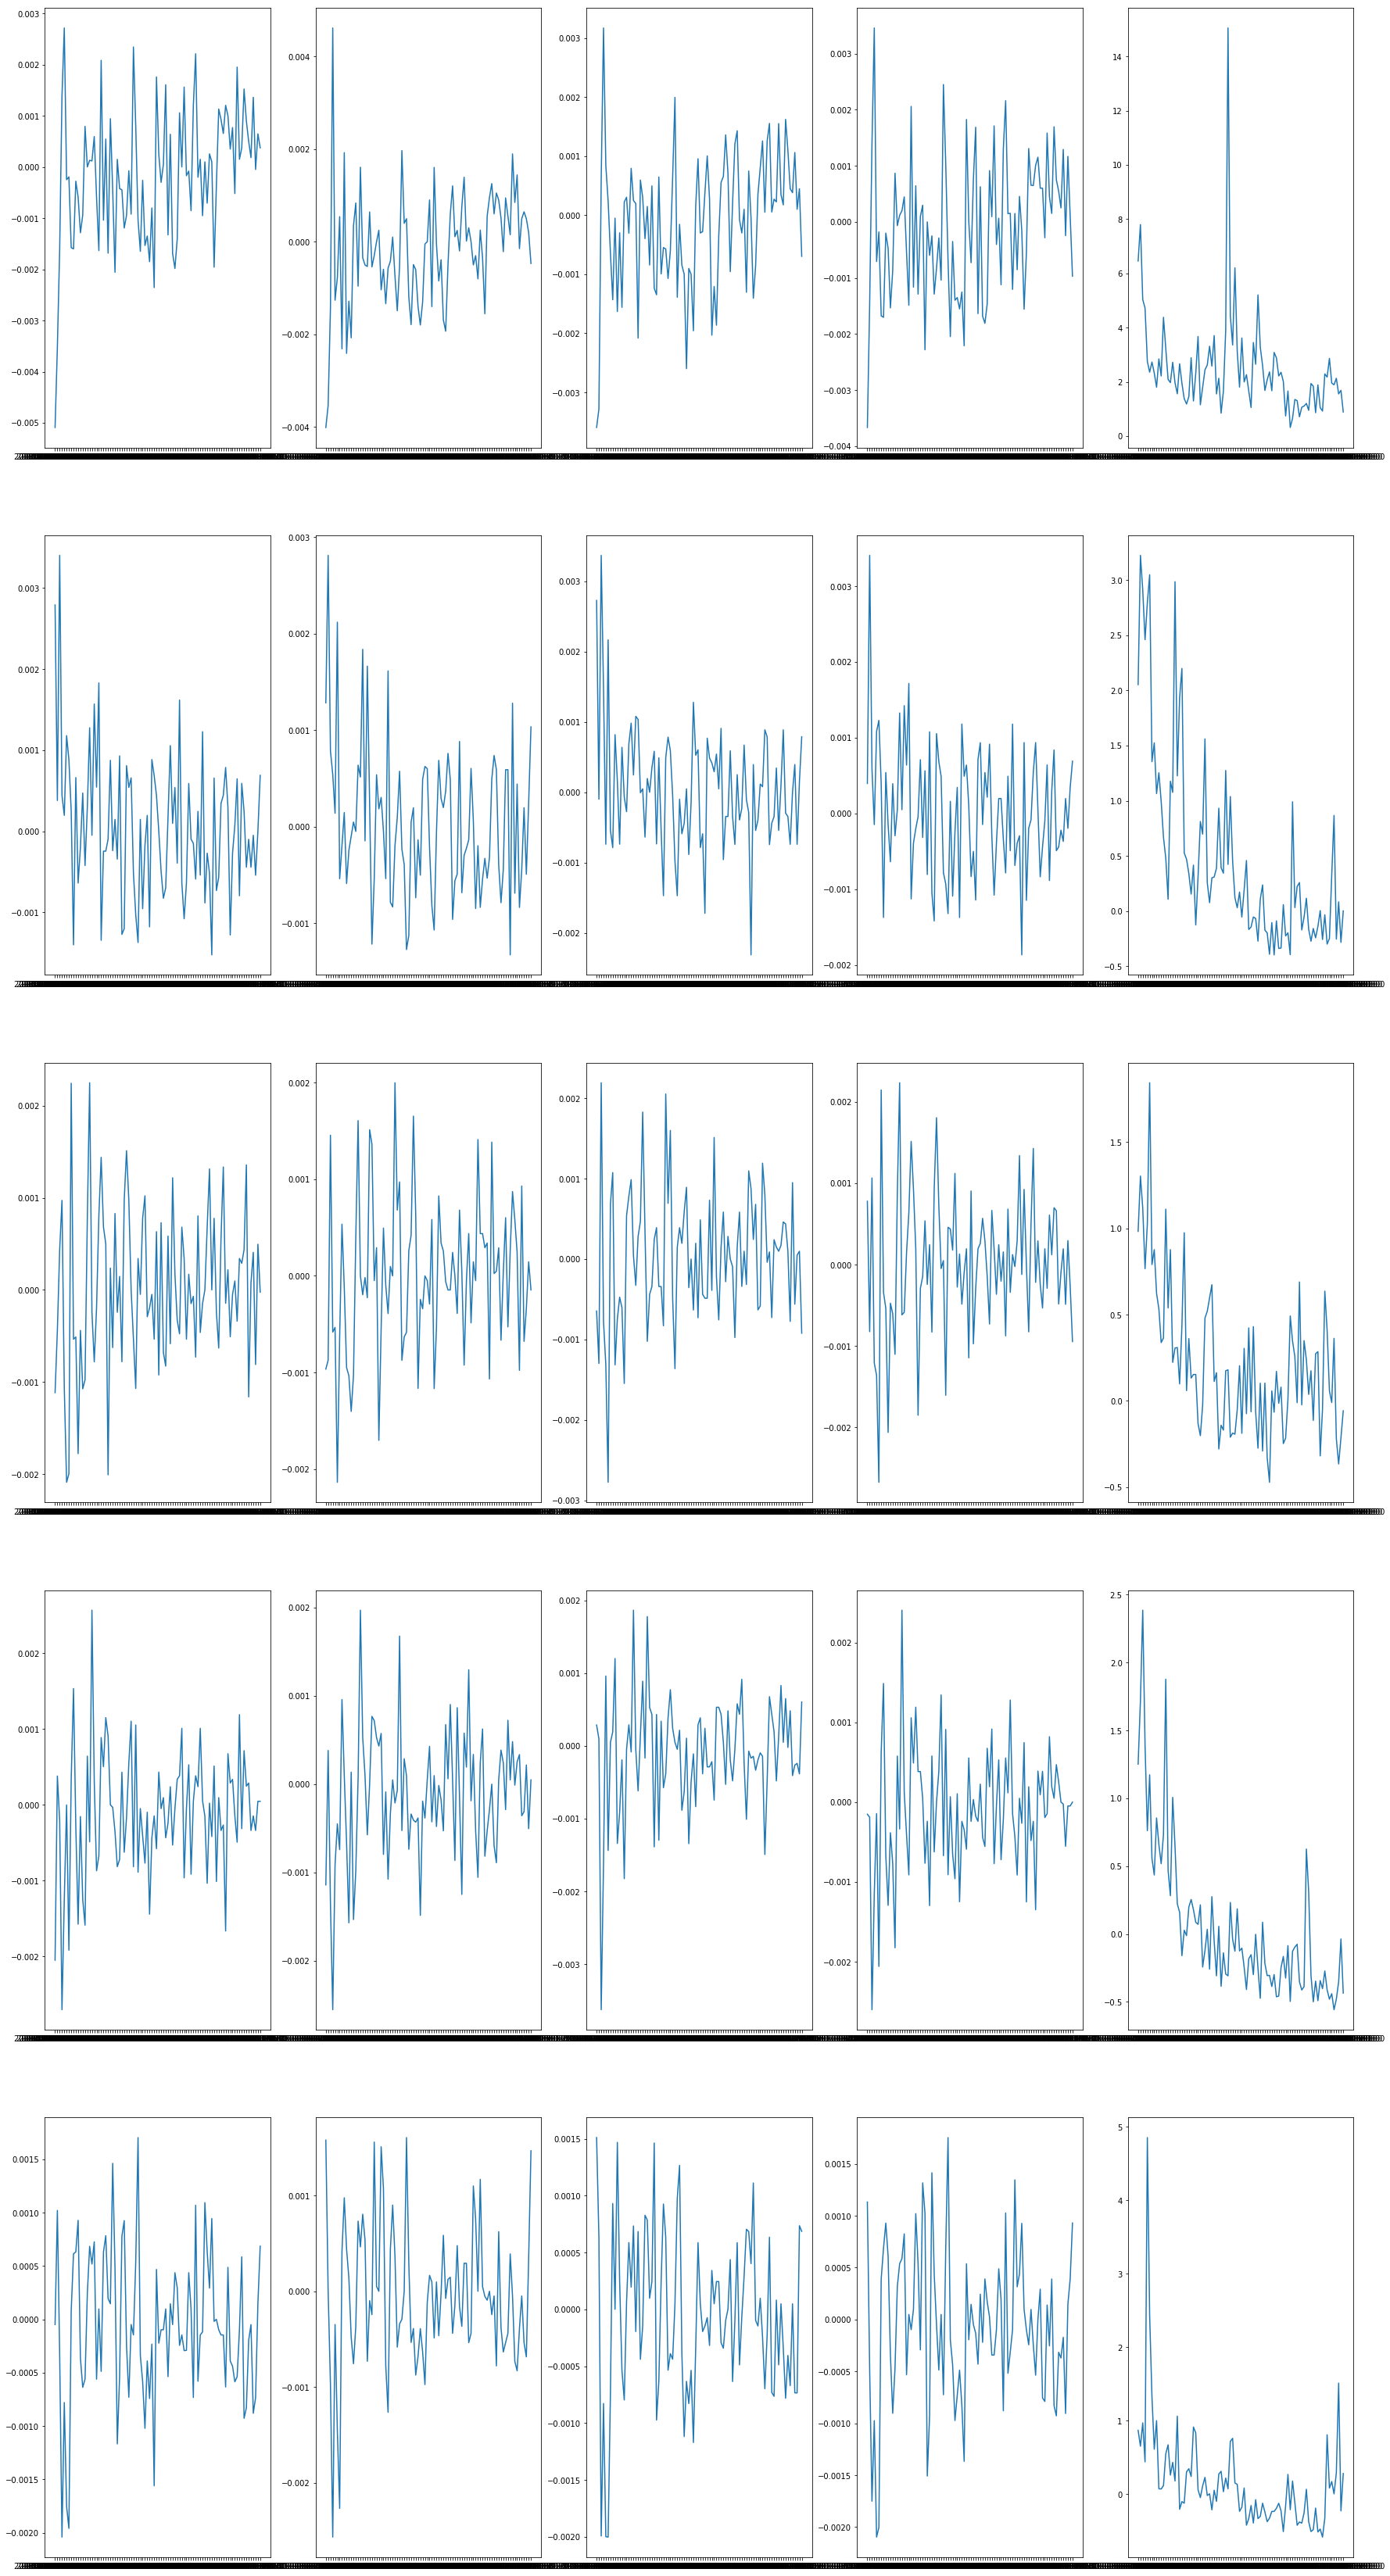

In [5]:
stock_index = 0
stock_start = stock_index * NUM_PER_STOCK
f,axes = plt.subplots(NUM_DAYS,NUM_PER_STOCK,figsize=(30,60))
for i in range(NUM_DAYS):
    for j in range(NUM_PER_STOCK):
        axes[i][j].plot(df.iloc[i*NUM_PER_DAY:(i)*NUM_PER_DAY + 90,stock_start+j])

In [26]:
arr = df.values

In [27]:
arr

array([[-5.09179927e-03, -4.01409830e-03, -3.59535067e-03, ...,
        -1.01806178e-03, -6.70346012e-04,  1.67957180e+00],
       [-3.51852763e-03, -3.53877912e-03, -3.28209184e-03, ...,
        -9.93797353e-05, -9.56470703e-04,  5.83213338e-01],
       [-1.60497790e-03, -1.43040347e-03,  6.15434970e-04, ...,
        -1.76619503e-04, -1.76619503e-04,  5.78281786e-04],
       ...,
       [ 2.93441581e-04,  9.77421562e-05, -4.89069301e-04, ...,
        -7.64000306e-05, -7.63475340e-04,  1.36185359e+00],
       [-7.33388745e-04, -9.28459734e-04, -1.95723443e-04, ...,
         7.64058680e-05,  7.64058680e-05,  2.38653802e+00],
       [ 1.95713866e-04,  5.86940572e-04, -2.44702197e-04, ...,
        -1.29880052e-03, -1.29880052e-03,  5.61662680e+00]])

In [28]:
m = arr.mean(axis=0)
m

array([ 1.54027747e-06,  4.75336677e-07,  6.44611910e-06,  4.76902994e-06,
       -4.84045823e-17,  1.16602965e-05,  8.11824597e-06,  1.34296113e-05,
        1.00880431e-05, -6.34739333e-17,  1.53598087e-05,  1.56052982e-05,
        2.48368135e-05,  2.26677070e-05,  4.04132597e-17,  5.06170334e-06,
        5.04542782e-06,  6.17717988e-06,  5.76480509e-06, -3.17369667e-17,
        1.02563696e-05,  1.16700732e-05,  9.35065824e-06,  1.05706167e-05,
        1.38364042e-16, -1.82314117e-05, -1.94608988e-05, -1.56959788e-05,
       -1.59978672e-05, -9.72658115e-17,  1.81698275e-05,  1.47217290e-05,
        1.76603205e-05,  1.56634453e-05,  5.20577583e-17,  1.01112806e-05,
        1.17294493e-05,  1.30142536e-05,  1.41164320e-05, -8.03698724e-17,
       -4.13563427e-06, -3.47243160e-06, -6.38020543e-06, -5.69823042e-06,
        1.18728221e-17,  8.85957365e-06,  7.75384683e-06,  9.05354401e-06,
        7.46087780e-06,  1.46127041e-17,  2.06067235e-05,  1.64067722e-05,
        2.32574148e-05,  

In [29]:
s = arr.std(axis=0)
s

array([6.25317805e-04, 5.83522546e-04, 5.77186490e-04, 6.22649927e-04,
       1.00000000e+00, 6.55506390e-04, 5.96397686e-04, 5.82505435e-04,
       6.64834179e-04, 1.00000000e+00, 1.03433838e-03, 9.42130550e-04,
       9.49913467e-04, 1.05806124e-03, 1.00000000e+00, 8.19358870e-04,
       7.98779850e-04, 8.22177622e-04, 8.40344560e-04, 1.00000000e+00,
       5.15211032e-04, 4.83789274e-04, 4.99961711e-04, 5.31669691e-04,
       1.00000000e+00, 7.59356161e-04, 7.00758995e-04, 7.26758706e-04,
       7.66404895e-04, 1.00000000e+00, 4.21260270e-04, 4.08767517e-04,
       4.13543432e-04, 4.39365224e-04, 1.00000000e+00, 5.24720998e-04,
       4.67431160e-04, 4.63727200e-04, 5.24260328e-04, 1.00000000e+00,
       5.20104026e-04, 4.87011220e-04, 4.80405252e-04, 5.37917154e-04,
       1.00000000e+00, 5.95472228e-04, 5.49742563e-04, 5.56744541e-04,
       6.13754157e-04, 1.00000000e+00, 5.11214043e-04, 4.82773713e-04,
       4.84241719e-04, 5.03933417e-04, 1.00000000e+00, 6.10195091e-04,
      

In [30]:
arr.min(axis=0)

array([-0.0050918 , -0.0040141 , -0.00362595, -0.00366621, -0.74746939,
       -0.00288184, -0.00315088, -0.00273623, -0.00336761, -1.06613124,
       -0.00629343, -0.00513224, -0.00602798, -0.00551431, -1.07556876,
       -0.00527269, -0.00398099, -0.00601522, -0.00520655, -0.79897811,
       -0.00464804, -0.00286745, -0.00340074, -0.00356119, -0.70320871,
       -0.00388324, -0.00380616, -0.00428409, -0.00398286, -0.94284641,
       -0.00366765, -0.00309554, -0.00289221, -0.00289221, -0.79103263,
       -0.00385958, -0.00385958, -0.00305188, -0.00295831, -0.91601931,
       -0.00248983, -0.00248983, -0.00277521, -0.00338409, -0.82468874,
       -0.00329103, -0.00322204, -0.00364723, -0.00343458, -0.91366068,
       -0.00395687, -0.00327774, -0.00370089, -0.00294173, -0.97570208,
       -0.00339771, -0.00277778, -0.0028746 , -0.003159  , -1.07143231,
       -0.0038794 , -0.00369004, -0.0035008 , -0.00601564, -0.7988551 ,
       -0.00339674, -0.00271862, -0.00328686, -0.00317101, -0.64

In [31]:
arr.max(axis=0)

array([3.40377076e-03, 4.61842430e-03, 3.36628769e-03, 3.45815631e-03,
       2.01299464e+01, 3.37930405e-03, 2.59740260e-03, 3.24494715e-03,
       3.15281899e-03, 1.24866201e+01, 7.18935469e-03, 6.18836710e-03,
       7.18935469e-03, 8.06451613e-03, 1.33147881e+01, 5.97909744e-03,
       4.61576846e-03, 5.97909744e-03, 6.21752751e-03, 2.26462128e+01,
       3.86046512e-03, 3.64400841e-03, 3.56372503e-03, 4.74111627e-03,
       2.03256434e+01, 3.93620631e-03, 3.46067721e-03, 4.19387434e-03,
       3.99020890e-03, 1.18851163e+01, 3.85993934e-03, 4.34303047e-03,
       3.85993934e-03, 4.34303047e-03, 1.73672722e+01, 2.12129453e-03,
       2.56027977e-03, 2.19420156e-03, 2.95540032e-03, 1.66737482e+01,
       2.64550265e-03, 3.24597259e-03, 2.04425204e-03, 2.52464535e-03,
       1.41854876e+01, 3.20992938e-03, 3.13926941e-03, 3.20992938e-03,
       3.42563517e-03, 1.95603498e+01, 5.64077190e-03, 7.10665535e-03,
       5.64077190e-03, 7.10665535e-03, 1.63821313e+01, 3.84749913e-03,
      

In [3]:
df = pd.read_hdf(DATA_HDF5,DATA_HDF5_ID)

In [4]:
df

AAPL                                      \
                           open        high         low       close   
Time                                                                  
2018-11-05 09:31:00  204.250000  204.280000  203.040000  203.180000   
2018-11-05 09:32:00  203.210000  203.460000  202.310000  202.435100   
2018-11-05 09:33:00  202.495000  202.740000  201.646000  202.140000   
2018-11-05 09:34:00  202.170000  202.450000  201.770100  202.420000   
2018-11-05 09:35:00  202.450000  203.385000  202.410000  203.120000   
2018-11-05 09:36:00  203.000000  203.127900  202.581000  202.976400   
2018-11-05 09:37:00  202.949500  202.970000  202.630000  202.940000   
2018-11-05 09:38:00  202.910000  203.080000  202.500000  202.600000   
2018-11-05 09:39:00  202.590000  202.610000  202.210000  202.255300   
2018-11-05 09:40:00  202.265600  203.000000  202.200000  202.215000   
2018-11-05 09:41:00  202.209300  202.510000  201.870100  202.120000   
2018-11-05 09:42:00  202.090000  202.250000  201.810000  201.810000   
2018-11-05 09:43:00  201.830000  201.830000  201.495000  201.635000   
2018-11-05 09:44:00  201.640000  201.900000  201.540000  201.810000   
2018-11-05 09:45:00  201.800000  202.069000  201.601400  201.796500   
2018-11-05 09:46:00  201.800000  201.875000  201.540000  201.820000   
2018-11-05 09:47:00  201.826300  202.200000  201.700000  201.860000   
2018-11-05 09:48:00  201.850000  202.129900  201.750000  201.950000   
2018-11-05 09:49:00  201.970000  202.028200  201.790000  201.840000   
2018-11-05 09:50:00  201.850000  201.920000  201.370000  201.540000   
2018-11-05 09:51:00  201.520000  202.050000  201.490000  201.955000   
2018-11-05 09:52:00  201.940000  201.940000  201.550000  201.720000   
2018-11-05 09:53:00  201.729900  201.880000  201.470000  201.850000   
2018-11-05 09:54:00  201.840000  201.880000  201.500000  201.590000   
2018-11-05 09:55:00  201.500000  201.930000  201.330000  201.610000   
2018-11-05 09:56:00  201.690000  201.720000  201.430000  201.670000   
2018-11-05 09:57:00  201.600000  201.600000  201.181000  201.210000   
2018-11-05 09:58:00  201.185000  201.330000  200.910000  201.210000   
2018-11-05 09:59:00  201.215000  201.215000  201.040000  201.090000   
2018-11-05 10:00:00  201.130000  201.130000  200.840000  201.040000   
...                         ...         ...         ...         ...   
2018-11-09 15:31:00  204.320000  204.380000  204.270000  204.325000   
2018-11-09 15:32:00  204.300000  204.320000  204.140000  204.270000   
2018-11-09 15:33:00  204.260000  204.410000  204.230000  204.410000   
2018-11-09 15:34:00  204.275784  204.417533  204.275784  204.396990   
2018-11-09 15:35:00  204.300000  204.360000  204.290000  204.290000   
2018-11-09 15:36:00  204.270000  204.350000  204.240000  204.280000   
2018-11-09 15:37:00  204.280000  204.430000  204.280000  204.380000   
2018-11-09 15:38:00  204.420000  204.490000  204.340000  204.430000   
2018-11-09 15:39:00  204.400000  204.430100  204.150000  204.430100   
2018-11-09 15:40:00  204.380000  204.430000  204.350000  204.380000   
2018-11-09 15:41:00  204.380000  204.520000  204.360000  204.400000   
2018-11-09 15:42:00  204.395000  204.430000  204.350000  204.420000   
2018-11-09 15:43:00  204.400000  204.482000  204.360000  204.482000   
2018-11-09 15:44:00  204.500000  204.510000  204.440000  204.470000   
2018-11-09 15:45:00  204.711196  204.711196  204.437424  204.480082   
2018-11-09 15:46:00  204.744400  204.744400  204.400000  204.480500   
2018-11-09 15:47:00  204.470000  204.510000  204.370000  204.420000   
2018-11-09 15:48:00  204.420000  204.440000  204.260000  204.370000   
2018-11-09 15:49:00  204.400000  204.470000  204.360000  204.385000   
2018-11-09 15:50:00  204.405000  204.470000  204.350000  204.440000   
2018-11-09 15:51:00  204.460000  204.510000  204.350000  204.380000   
2018-11-09 15:52:00  204.360100  204.486900  204.340000  204.420000   
2018-11-09 15:53:00  204.410000  204.440000  204.36

In [5]:
to_show = df.iloc[:,[3,8,13]].values

In [6]:
to_show = to_show.reshape([5,390,3])

In [7]:
df.iloc[390,3]

202.42

In [113]:
to_show_diff = to_show[:,1:,:] - to_show[:,:-1,:]

In [9]:
to_show_diff_pert = to_show_diff * np.random.uniform(low=0.5,high=1.5,size=(5,389,3))

In [10]:
to_show_diff_pert.shape

(5, 389, 3)

In [11]:
to_show_res = np.concatenate((to_show[:,[0,],:],to_show[:,:-1,:]+to_show_diff_pert),axis=1)

In [12]:
to_show

array([[[ 203.18  ,  106.4193, 1653.1158],
        [ 202.4351,  106.17  , 1644.    ],
        [ 202.14  ,  106.23  , 1639.1711],
        ...,
        [ 201.49  ,  107.65  , 1627.795 ],
        [ 201.4501,  107.555 , 1626.495 ],
        [ 201.57  ,  107.49  , 1627.13  ]],

       [[ 202.42  ,  107.48  , 1616.96  ],
        [ 202.5   ,  107.715 , 1630.    ],
        [ 203.19  ,  107.6287, 1636.5693],
        ...,
        [ 203.8732,  107.645 , 1642.38  ],
        [ 203.98  ,  107.63  , 1643.04  ],
        [ 203.87  ,  107.75  , 1643.774 ]],

       [[ 205.73  ,  109.89  , 1666.23  ],
        [ 205.89  ,  109.93  , 1671.3101],
        [ 205.7203,  109.705 , 1673.45  ],
        ...,
        [ 209.92  ,  111.995 , 1757.61  ],
        [ 209.9   ,  111.89  , 1758.    ],
        [ 209.98  ,  111.98  , 1756.    ]],

       [[ 209.7168,  111.58  , 1745.1   ],
        [ 209.685 ,  111.59  , 1745.8199],
        [ 209.6453,  111.49  , 1744.78  ],
        ...,
        [ 208.12  ,  111.48  , 1752.079

In [13]:
to_show_res.shape

(5, 390, 3)

In [14]:
to_show_res_0 = to_show_res[0,:,:]

In [15]:
to_show_res_0.shape

(390, 3)

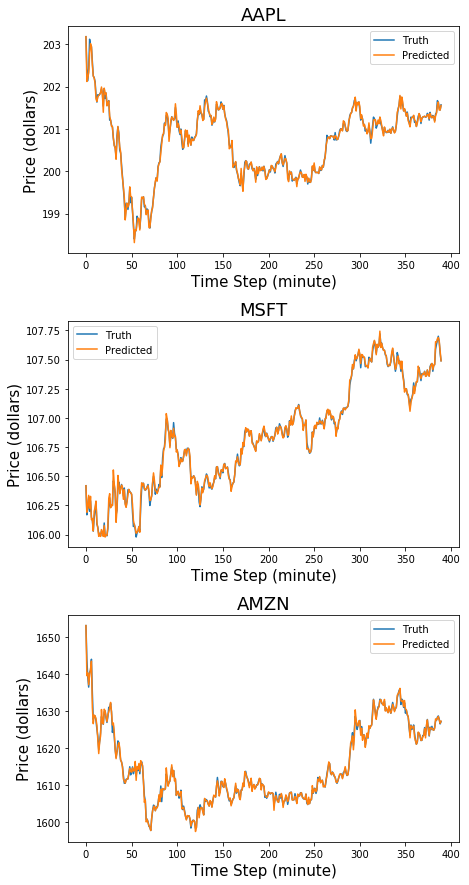

In [123]:
f,axes = plt.subplots(3,1,figsize=(7,15))
#f.suptitle('Truth and Prediction',fontsize=30)
for i in range(3):
    axes[i].plot(to_show[0,:,i])
    axes[i].plot(to_show_res_0[:,i])
    axes[i].set_title(STOCK_NAMES[i],fontsize=18)
    axes[i].set_xlabel('Time Step (minute)',fontsize=15)
    axes[i].set_ylabel('Price (dollars)',fontsize=15)
    axes[i].legend(['Truth','Predicted'])

plt.subplots_adjust(hspace=.3)
#plt.suptitle('Price vs. Time')

In [124]:
f.savefig('/pine/scr/s/i/siyangj/DeepStock/FinalProject/ReportNov14/Figures/PredTruth.jpg',format='jpg',dpi=1000)

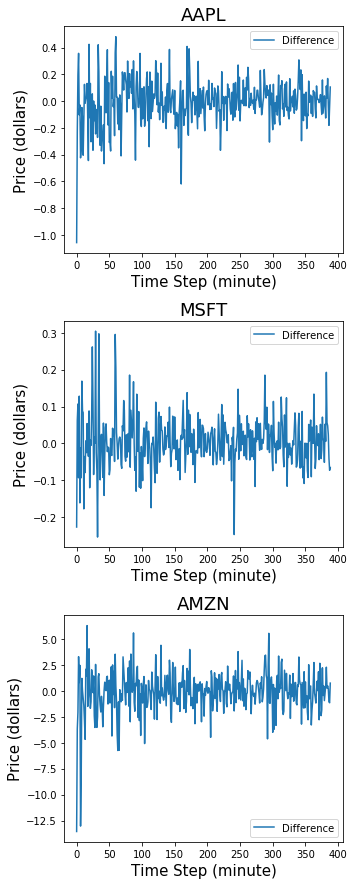

In [30]:
f,axes = plt.subplots(3,1,figsize=(5,15))
#f.suptitle('Truth and Prediction',fontsize=30)
for i in range(3):
    axes[i].plot(to_show_diff_pert[0,:,i])
    axes[i].set_title(STOCK_NAMES[i],fontsize=18)
    axes[i].set_xlabel('Time Step (minute)',fontsize=15)
    axes[i].set_ylabel('Price (dollars)',fontsize=15)
    axes[i].legend(['Difference',])

plt.subplots_adjust(hspace=.3)  

In [79]:
diff_decay = decay = 1 - np.arange(1,390) * 0.5/389 + np.random.randn(389) * 0.1

In [116]:
to_show_diff_predict = np.copy(to_show_diff)
for i in range(3):
    diff_decay = 1 - np.arange(1,390) * 0.5/389 + np.random.randn(389) * 0.03
    to_show_diff_predict[0,:,i] = to_show_diff[0,:,i] * (1+np.random.randn(389)*0.8*diff_decay)

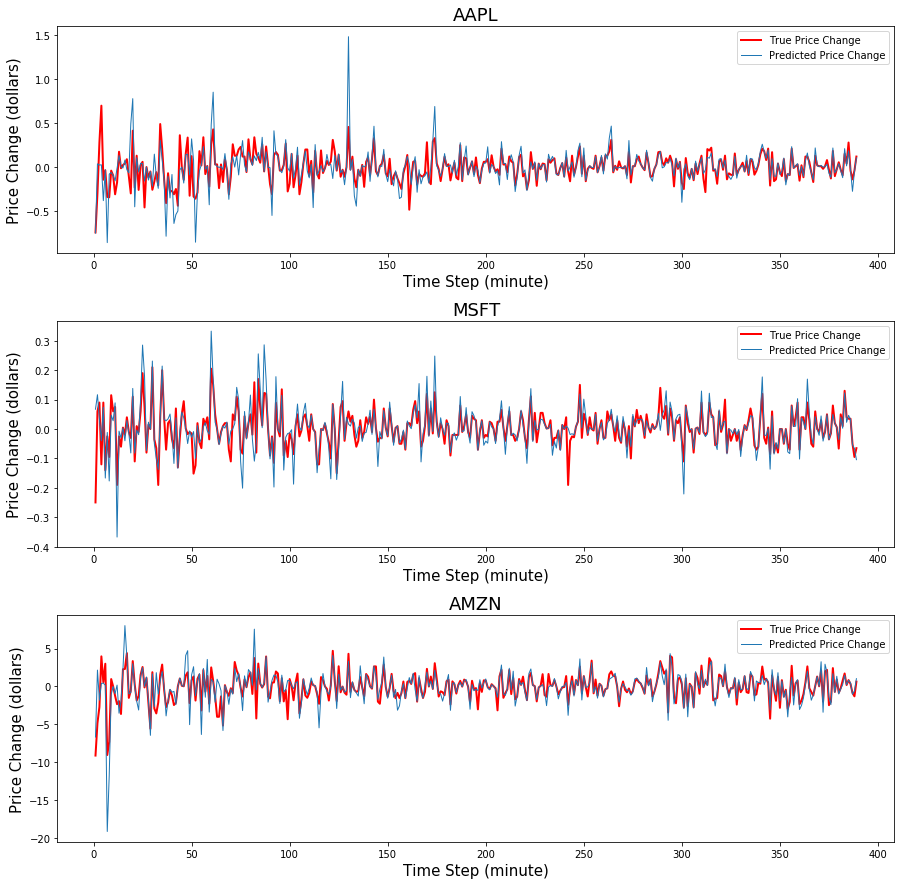

In [121]:
f,axes = plt.subplots(3,1,figsize=(15,15))
#f.suptitle('Truth and Prediction',fontsize=30)
for i in range(3):
        
    axes[i].plot(np.arange(1,390),to_show_diff[0,:,i],linewidth=2, c='r')
    axes[i].plot(np.arange(1,390),to_show_diff_predict[0,:,i], linewidth=1)
    axes[i].set_title(STOCK_NAMES[i],fontsize=18)
    axes[i].set_xlabel('Time Step (minute)',fontsize=15)
    axes[i].set_ylabel('Price Change (dollars)',fontsize=15)
    axes[i].legend(['True Price Change','Predicted Price Change'])

plt.subplots_adjust(hspace=.3)

In [304]:
mean_trend_error_rate[:60] = np.exp(-1.5-np.arange(60)/20) * 100 + 3
mean_trend_error_rate[60:250] = np.exp(-np.arange(1,191)/100) * (mean_trend_error_rate[59] - 3) +3
mean_trend_error_rate[250:] = np.exp(-np.arange(1,140)/200) * (mean_trend_error_rate[249] - 3) +3

trend_error_pert = np.exp(-0.6-np.arange(390)/170) * np.random.randn(390) * 3

#temp = trend_error_pert[:-2] + trend_error_pert[1:-1] + trend_error_pert[2:]
temp = trend_error_pert[1:] + trend_error_pert[:-1]

mean_trend_error_rate_pert = np.clip(mean_trend_error_rate + temp,2,100)

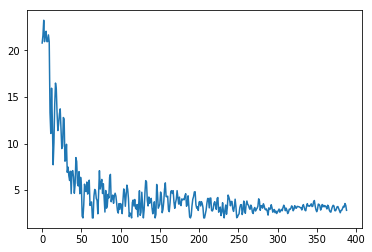

In [305]:
plt.plot(mean_trend_error_rate_pert)

In [353]:
mean_trend_error_rate_pert.mean()

4.534356588242612

In [388]:
trend_error_error = abs(np.exp(-0.6-np.arange(389)/160) * np.random.randn(389) * 7) + \
    np.exp(-np.arange(389)/80) + 1
trend_upper = np.clip(mean_trend_error_rate_pert + trend_error_error,0,100)
trend_lower = np.clip(mean_trend_error_rate_pert - trend_error_error,0,100)

Text(0.5,1,'Average Trend Error Rate vs. Time Step with Error Bars')

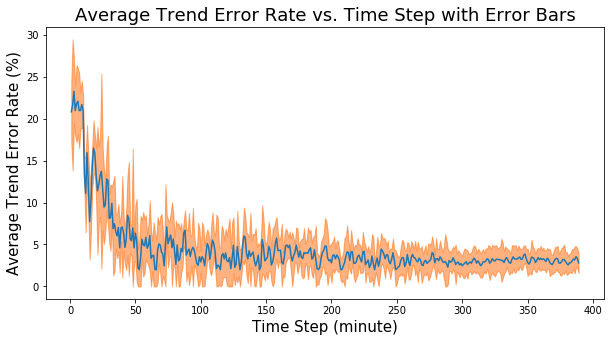

In [389]:
f = plt.figure(figsize=(10,5))
plt.plot(np.arange(1,390),mean_trend_error_rate_pert)
plt.fill_between(np.arange(1,390),trend_upper,trend_lower,
                 alpha=0.5,color =(1, 0.4, 0))
plt.xlabel('Time Step (minute)',fontsize=15)
plt.ylabel('Average Trend Error Rate (%)',fontsize=15)
plt.title('Average Trend Error Rate vs. Time Step with Error Bars', fontsize=18)

In [390]:
f.savefig('/pine/scr/s/i/siyangj/DeepStock/FinalProject/ReportNov14/Figures/AvgTrendError.jpg',format='jpg',dpi=1000)

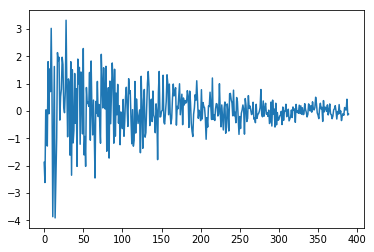

In [369]:
plt.plot(trend_error_pert)

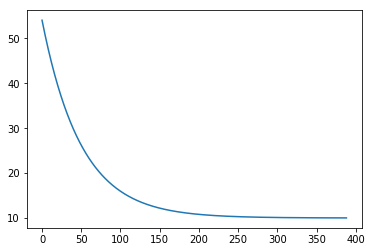

In [156]:
plt.plot(mean_trend_error_rate)

In [122]:
f.savefig('/pine/scr/s/i/siyangj/DeepStock/FinalProject/ReportNov14/Figures/PriceChange.jpg',format='jpg',dpi=1000)

In [35]:
to_show_diff_percent = to_show_diff_pert[0,:,:] / to_show_diff[0,:,:]

/nas/longleaf/home/siyangj/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


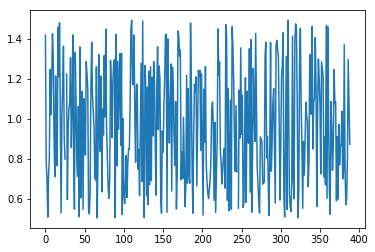

In [51]:
plt.plot(to_show_diff_percent[:,0])

In [38]:
decay = np.a0.4 / 390

0.0010256410256410256

In [56]:
decay = 1 - np.arange(1,390) * 0.4/389 + np.random.randn(389) * 0.1

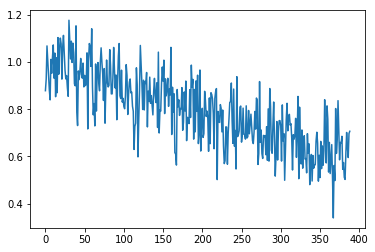

In [57]:
plt.plot(decay)

In [58]:
to_show_diff_percent_decay_0 = to_show_diff_percent[:,0] * decay

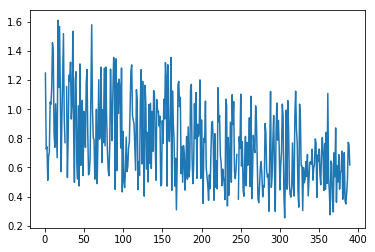

In [59]:
plt.plot(np.arange(1,390),to_show_diff_percent_decay_0)